<h2>FIN5615 Project #2E
    <p class="text-primary">Bond Spreads</p>
</h2>

<div class = "alert alert-block alert-danger">
    <b>Due Date</b>: October 23rd, 2020
</div>  
<div class = "panel panel-success">
    <div class = "panel-heading"> 
    <span style="color:black"><b>Project Introduction</b>
    </div>
    <div class = "panel-body"> 
    A corporate bond's yield compensates an investor for risks inherent in lending a corporation money. Naturally, investors demand a return on their investment higher than the risk-free rate, but by how much? 
    <br><br>The credit spread represents the extra yield an investor demands above the risk-free rate to compensate for the risk of the corporation defaulting on their debt obligations. The higher the credit spread, the cheaper the bond price due to the perception of higher risk by investors. The credit spread can also be interpreted as the probability of default for the company. 
    <br><br>Here we will estimate the credit spread on a corporate bond issued by GE, by first simulating the floating risk-free rate then applying a credit spread on top in order to match market observed prices. 
    </div>
</div>
<div class = "panel panel-info">
    <div class = "panel-heading"> 
    <span style="color:black"><b>Instructions</b>
    </div>
    <div class = "panel-body"> 
    Please code you solutions directly in this Notebook under each task in the cells provided below. Include all code used to produce your results, and support your answers with textual explanations if neccessary. You may feel free to add additional Code and/or Markdown cells as needed. Code must be written using **Python 3**.  
    
    <br>Please order the cells in your Notebook in the order in which they are intended to run! It is expected that your Notebook is able to run in sequence from start to finish without any errors (before submitting check by: `Kernel > Restart & Run All`).  
      
    <br>Once ready, please submit your assignment as an **.ipynb file** (`File > Download as > Notebook`). You must name your files in the following format: **`FIN5615_Assignmnet_1_Richard_Lee_tuc12345.ipynb`**.
    </div>
</div>

---
<div class = "alert alert-block alert-warning">
    <b>Note</b>: Add any additional libraries that you plan on using to the import statements in the code block below.
</div>

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 1</b>
    </div>
    <div class = "panel-body"> 
    Before we can estimate credit risk, first we need to estimate the amount interest-rate risk impacting the overall bond market. 
    <br><br>
    We can do this by simulating future risk-free interest rates, which we will treat as the 1-year Treasury rate, and we will assume follows the below random process (specifically, a Cox-Ingersoll-Ross model, but do not need to understand the math here, we only need the below formula):
    <br><br>
    $$r_{t+1} = r_t + a(b - r_t) + \sigma\sqrt{r_t}dZ_t$$
    <br>
    Note that $dZ_t$ represents just a random draw from a standard normal distribution.
    <br><br>
    Simulate 1000 trials of interest rates for the next 15 years in 1-year increments <i><b>using numpy arrays</b></i>. Assume the following parameters for the random process, with a starting interest rate ($r_0$) of 2.66%:
    <ul>
        <li>$a$ = 0.150171427</li>
        <li>$b$ = 0.013625329</li>
        <li>$\sigma$ = 0.00288994</li>
    </ul>
    Plot 100 paths from the simulation as well as the average path on a single line plot. Label all axis and provide a title for the plot.
    <br><br>
    Set the random seed to 5615 at the beginning of your code (<code>np.random.seed(5615)</code>).
    <p style="text-align:right;">[15pts]</p>
    </div>
</div>

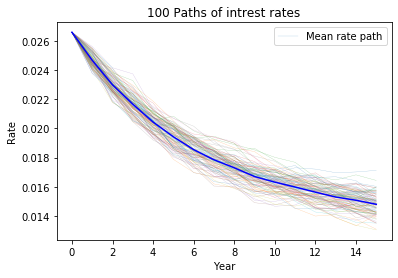

[0.026600000000000016, 0.024683037003977167, 0.022993691449690826, 0.021671286922156537, 0.020442486713345073, 0.01942890096170794, 0.018552228339181232, 0.01785509859596102, 0.017306453744044648, 0.016705992396267695, 0.01632006162513225, 0.015986071371625922, 0.015633685781053463, 0.015299656135791217, 0.015078369664905436, 0.014800467391890306]


In [30]:
random.seed(5615)

a= 0.150171427
b= 0.013625329
sigma = 0.00288994
r0 = .0266
trials = 100

#trial portion
#rate_trials = []
#for trial in range(trials):

sims=[]
for trial in range(trials):
    sim = []
    for i in range(16):
        if i == 0:
            trial= r0
            sim.append(trial)
        else:
            trial = sim[-1]+(a*(b-sim[-1]))+(sigma*(sim[-1]**.5)*np.random.normal())
            sim.append(trial)
    
    sims.append(sim)
#average price line    

steps = 16
average_path = []
for step in range(steps):
    average_price = np.mean([trial[step] for trial in sims])
    average_path.append(average_price)

    
    
# trials graph with billion lines
    
    
for i in range(trials):
    plt.plot(sims[i],alpha=.5,linewidth=.25)

plt.plot(average_path,color = "blue",alpha = 1)
plt.title('100 Paths of intrest rates')
plt.legend(['Mean rate path'])
plt.xlabel('Year')
plt.ylabel('Rate')    
plt.show()

print(average_path)

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 2</b>
    </div>
    <div class = "panel-body"> 
    Back in 2018, General Electric (GE) was not doing well. Due to decreated earnings and increased losses, GE stock was down by over 50% for year-to-date, and they also abruptly fired their CEO. During this time on October 2018, a 15-year GE corporate bond paying a coupon rate of 5.25% was valued at \$982.86.
    <br><br>
    Assume annual coupon payments, create a numpy array called <code>cashflows</code> to store the future cashflows of this GE bond for each year over the next 15 years (check that the array is of length 15). Plot the cashflows in a bar plot with appropriate axis labels and a title.  
    <p style="text-align:right;">[5pts]</p>
    </div>
</div>

16


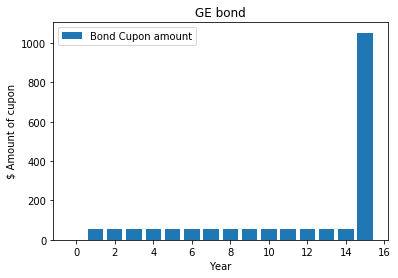

In [8]:
cashflows=np.array([0,52.5,52.5,52.5,52.5,52.5,52.5,52.5,52.5,52.5,52.5,52.5,52.5,52.5,52.5,1052.5])
print(len(cashflows))

plt.bar(np.arange(len(cashflows)),cashflows)
plt.title('GE bond')
plt.legend(['Bond Cupon amount'])
plt.xlabel('Year')
plt.ylabel('$ Amount of cupon')
plt.show()
    

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 3</b>
    </div>
    <div class = "panel-body"> 
    Calculate the average net present value (NPV) of the GE bond's cashflows by discounting using the simulated paths of 1-year risk-free rates from Task 1. This average NPV is the "fair value" of the GE bond in the absence of any credit risk and assuming the bond's cashflows are gaurenteed. 
    <br><br>
    Recall we can calculate the present value of a future cashflow at time t over a path of interest rates along times 1 to t by:
    <br><br>
    $$PV = CF_t \exp{\left(\sum_{s = 1}^t r_s\right)}$$
    <br><br>
    And recall that the NPV is then calculated by:
    $$NPV = \sum_{t = 1}^T PV_t$$
    <br><br>
    Plot a histogram of the distribution of the NPV of the GE bond. Label all axis and provide a title. Are there any scenarios from our simulation where the GE bond's fair value is at or below its current market price of \$982.86?
    
    <p style="text-align:right;">[15pts]</p>
    </div>
</div>

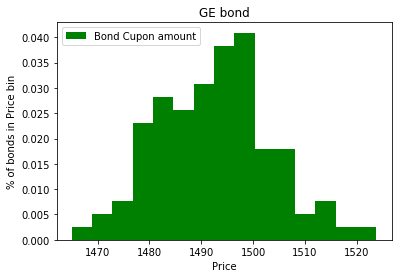

In [28]:
average_path
time_period = np.arange(0,16)

NPVs = []
for sim in sims:
    negative_rate=np.negative(sim)
    discount_factor = np.exp(negative_rate * time_period)
    PV_Cashflows = cashflows * discount_factor
    NPV = np.sum(PV_Cashflows)
    NPVs.append(NPV)



plt.hist(NPVs, color = "Green",bins = 15,density = True)
plt.title('GE bond')

plt.xlabel('Price')
plt.ylabel('% of bonds in Price bin')
plt.show()

With the rates we have , i even used excel with the simulated rates and mabey i did that part wrong but i get close to 1491. This is becasue its a super previum bond , it pays 5.25 while the market rates we had were at around 2 the lowest being ~1.48

SORRYYYYY none of them are even close

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 4</b>
    </div>
    <div class = "panel-body"> 
    Write a function that performs the same NPV calculation on the GE bond cashflows as Task 3, except it takes an additional input parameter <code>spread</code>, representing the credit spread, which is applied during the discounting, specifically: 
    <br><br>
    $$NPV = \sum_{t = 1}^T \left(CF_t\exp{\left[\sum_{s = 1}^t(r_s + \text{spread})\right]}\right)$$
    <br><br>
    The function then returns the expected NPV, representing the price of the bond. Use this function to price the GE bond first assuming a 0% credit spread, and then again with a 10% credit spread. Verify that these two credit spreads results in prices that bound the observed market price of \$982.86.
    <p style="text-align:right;">[10pts]</p>
    </div>
</div>

In [50]:
average_path
time_period = np.arange(0,16)

def BondPrice(spread):



    NPVs = []
    for sim in sims:
        spread_rate= [x + spread for x in sim ] 
        negative_rate=np.negative(spread_rate)
        discount_factor = np.exp(negative_rate * time_period)
        PV_Cashflows = cashflows * discount_factor
        NPV = np.sum(PV_Cashflows)
        NPVs.append(NPV)
        
        expected = np.mean(NPVs)
        
        return expected





In [53]:
BondPrice(.0)


1487.932670649394

In [54]:
BondPrice(.1)

526.6595835728027

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 5</b>
    </div>
    <div class = "panel-body"> 
    The market-implied credit spread on GE is the amount of spread that when applied to the NPV calculation on the GE corporate bond cashflows, gives us the market observed price. 
    <br><br>
    Estimate the market-implied credit spread on GE using the <b>bisection method</b> on the function created in the previous task. Use 0% and 10% as the initial bounds for the bisection method. 
    <br><br>
    According to this estimated credit spread, what is the probability of GE defaulting on their debt in any given year?
    <p style="text-align:right;">[20pts]</p>
    </div>
</div>

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 6</b>
    </div>
    <div class = "panel-body"> 
    The GE bond described in the previous tasks was not callable. For a callable bond, investors would demand some additional yield to compensate for the reinvestment risk associated with the bond being called away. (When a bond is called, the face amount is returned to the investor, and no more future coupons would be paid.) 
    <br><br>
    This is because the bond issuer (i.e. the company) would favor calling the bond when rates are low so that they can reissue a cheaper bond and pay lower coupon rates. Bond investor do not like this because if the bond the called they must now reinvest in a low interest rate environmnet. For this reason, callable bonds tends to be valued less in the form of an additional spread added to its yield.
    <br><br>
    A 15-year callable GE bond paying a 6.25% coupon rate is valued at \$986.45. Assume that the bond can only be called at the end of each year, and that GE would only call the bond if the 1-year Treasury rate falls below 1.5%.
    <br><br>
    Using the same set of interest rate paths simulated from Task 1, calculate the following:
    <ul>
        <li>The percentage of trials where the GE bond would be called.</li>
        <li>Another numpy array storing the simulated cashflows for the GE callable bond under each interest rate path. The shape of this cashflow array should be <code>(1000, 15)</code>.</li>
        <li>The average cashflow received from the callable GE bond at each year averaged across the 1000 trials. Plot this in a bar plot with appropriate axis labels and a title. Explain how this plot is different than the bar plot of the non-callable GE bond from Task 2.</li>
    </ul>
    
    <p style="text-align:right;">[15pts]</p>
    </div>
</div>

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 7</b>
    </div>
    <div class = "panel-body"> 
    As mentioned previously, for a callable bond, investors would demand some additional yield to compensate for the reinvestment risk associated with the bond being called away. This additional spread is known as the "<b>option-adjusted spread (OAS)</b>".
    <br><br>
    If we assume that the credit risk is equivalent to the non-callable GE bond, we can apply the same credit spread estimated from Task 5 when discounting cashflows for the callable GE bond. Any further incremental spread needed to match market observed prices can then be attributed to the call risk and is thus the OAS. 
    <br><br>
    Rewrite the funciton from Task 4 to apply the credit spread estimated from Task 5 as a constant. Additionally, modify the input parameter to be the OAS instead, and then incorporate the OAS in the NPV calculation. Specifically:
    <br><br>
    $$NPV = \sum_{t = 1}^T \left(CF_t\exp{\left[\sum_{s = 1}^t(r_s + \text{credit spread} + \text{OAS})\right]}\right)$$
    <br><br>
    Then estimate the market-implied OAS by calibrating the spread such that the NPV of the callable GE bond cashflows matches the observed market price for the callable bond. Use the bisection method with 0% and 5% as initial bounds.  
    <p style="text-align:right;">[20pts]</p>
    </div>
</div>